# <span style="color:green"> Laboratorio di simulazione numerica </span>
### Martina Colombo, 977556
## <span style="color:blue">  Esercitazione 3</span>

In [19]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from IPython.display import HTML

In [20]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

In [21]:
params = {'font.size':18, 'legend.fontsize': 'large' ,'axes.labelsize': 'x-large','axes.titlesize':'x-large','xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Esercizio 03.1 
In questa esercitazione analizziamo un'applicazione del moto Browniano geometrico all'ambito dell'econofisica. Il moto Browniano geometrico è un tipo di moto Browniano che può essere applicato al calcolo dell'andamento del prezzo $S(t)$ di un bene nel mercato finanziario, l'equazione differenziale stocastica che lo descrive è data da $dS(t) = \mu S(t)dt + \sigma S(t)dW(t)$ dove $W(t)$ è un processo di Wiener. L'equazione che descrive l'andamento di $S(t)$ nel tempo se $S$ è un moto Browniano geomertico con valore iniziale $S(0)$ è data da $S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$ con $W(t)\sim\mathcal{N}(0,t)$, nel caso discreto invece è data da $S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$ con $Z_i \sim \mathcal{N}(0,1)$. L'obiettivo è quello di determiare il valore delle opzioni Europee call $C(S(t))$ e put $P(S(t))$ al tempo iniziale $t=0$ sapendo quando vale $S(t)$ al tempo $T$ finale. Un'opzione Europea è un contratto tra due parti in cui il venditore dell'opzione concede all'acquirente o titolare il diritto di acquistare (call option) dal venditore o vendergli (put option) una data quantità di una attività finanziaria detta sottostante $S(t)$, a una determinata data di scadenza $T$ e ad un determinato prezzo $K$ (strike price). Il venditore ha l'obbligo di vendere o acquistare l'attività sottostante al tempo $T$. Il titolare può decidere di sfruttare il suo diritto di acquistare o vendere se ottiene un profitto, ovvero se $S(T)>K$ per un'opzione call con profitto dato dal $max[0,S(T)-K]$, o se $S(T)<K$ per un'opzione put con profitto dato dal $max[0,K-S(T)]$. La teoria di Black-Scholes assume che l'evoluzione nel tempo del prezzo dell'attività è stocastico e mostra l'andamento di un moto Browniano geometrico. Dalla teoria di B-S abbiamo che il valore delle opzioni di call e put al tempo iniziale $t=0$ è dato da: 

- opzione Call:
$$ C\left[ S(0),0 \right] = e^{-rT}\cdot \max(0,S(T)-K) $$
- opzione Put:
$$ P\left[ S(0),0 \right] = e^{-rT}\cdot \max(0,K-S(T))$$

dove l'esponenziale $e^{-rT}$ rappresenta lo sconto del tasso di interesse accumulato nel tempo (con $r$ tasso di interesse senza rischio) che deve essere tolto per conoscere il valore delle opzioni al tempo iniziale. 

Utilizzando i parametri: 
- prezzo dell'attività a $t=0$: $S(0)=100$
- scadenza: $T=1$
- strike price: $K=100$
- tasso di interesse senza rischio: $r=0.1$
- volatilià: $\sigma=0.25$

calcoliamo i valori di $C[S(0),0]$ e $P[S(0),0]$ tramite il metodo a blocchi in due modi:
1. Campionando direttamente la distribuzione dei tempi finali di $S(T)$ tramite la formula $S(T) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)T+\sigma W(T)\right]$;
2. Campionando il moto Browniano geometrico discretizzato tramite $S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$ dividendo l'intervallo di tempo $[0,T]$ in $10^2$ sottointervalli da $S(0)$, $S(t_1)$, $S(t_2)$, .. fino a $S(t_{100}=T=1)$.

Nel primo caso il programma genera per ogni blocco $L$ numeri casuali $W$ distribuiti in modo gaussiano con media pari a $0$ e varianza $T$, calcola i valori di $S(T)$ e determina il valore delle opzioni put e call e la loro incertezza al tempo $t=0$ iniziale tramite le funzioni scritte sopra utilizzando il metodo a blocchi. 
Nel secondo caso il programma per ogni blocco genera $L$ sequenze $S(0), S(t+dt) ..S(T)$ con $dt = T/K$ utilizzando la formula $S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$ dove $Z_i$ è un numero casuale distribuito secondo una gaussiana normale, per ogni sequenza calcoliamo il valore della call e della put utilizzando il valore finale di $S(T)$ di ciascuna sequenza, determinaimo poi il valore medio e l'incertezza rispettive tramite il metodo a blocchi.

Di seguito riportiamo i valori dell'andamento del valor medio delle opzioni call e put in funzione del numero di blocchi $\#_{blocks} = 10^2$ calcolati con entrambi i metodi di sampling. Dalla soluzione analitica della teoria di Black-Scholes è possibile confrontare l'andamento dei risultati con il valore teorico atteso che vale $call_{teo}= 14.97579$ per l'opzione call e $put_{teo}=5.45953$ per l'opzione put. Dai grafici è possibile vedere come entrambi i metodi di sampling convergono al valore atteso, grazie al metodo a blocchi vediamo che all'aumentare del numero di blocchi l'incertezza statistica diminuisce fino a settarsi ad un valore costante.

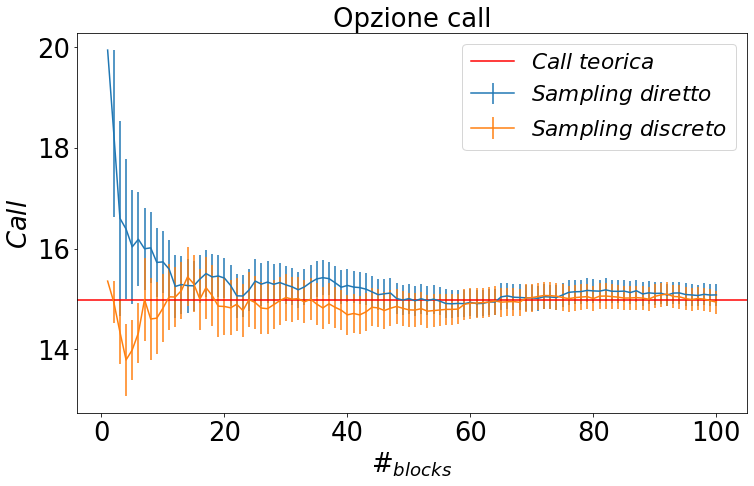

In [22]:
plt.figure(figsize=(12,7))

x, c, error_c= np.loadtxt("direct_samp.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
c1, error_c1 = np.loadtxt("disc_samp.dat", usecols=(1,2), delimiter=' ', unpack='true')

plt.errorbar(x,c,yerr=error_c, label= '$Sampling$ $diretto$')
plt.errorbar(x,c1,yerr=error_c1, label='$Sampling$ $discreto$')
plt.axhline(y=14.975790778311286, color='red', label= '$Call$ $teorica$')
plt.xlabel('$\#_{blocks}$')
plt.ylabel('$Call$')
plt.legend(loc='best')
plt.title('Opzione call')


plt.show()

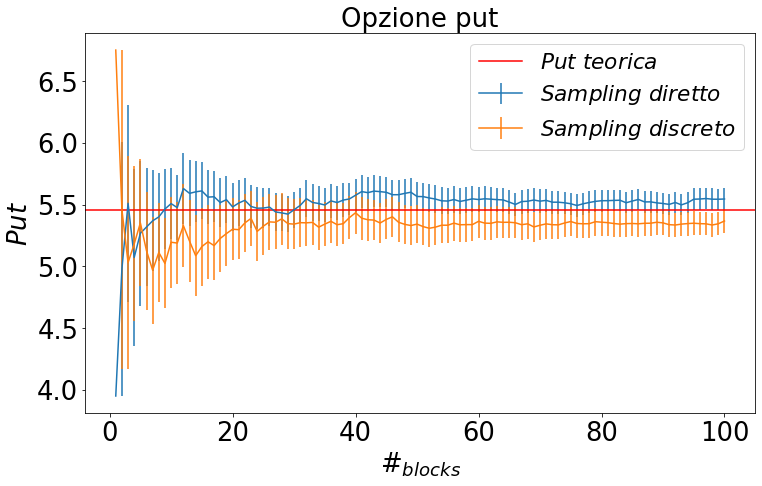

In [23]:
plt.figure(figsize=(12,7))

x, p, error_p= np.loadtxt("direct_samp.dat", usecols=(0,3,4), delimiter=' ', unpack='true')
p1, error_p1 = np.loadtxt("disc_samp.dat", usecols=(3,4), delimiter=' ', unpack='true')

plt.errorbar(x,p,yerr=error_p, label='$Sampling$ $diretto$')
plt.errorbar(x,p1,yerr=error_p1, label='$Sampling$ $discreto$')
plt.axhline(y=5.4595325819072364, color='red', label= '$Put$ $teorica$')
plt.xlabel('$\#_{blocks}$')
plt.ylabel('$Put$')
plt.legend(loc='best')
plt.title('Opzione put')


plt.show()